In [3]:
from unityagents import UnityEnvironment
import numpy as np

import gym

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dqn_agent import Agent

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# please do not modify the line below
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
agent = Agent(state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size)

def dqn_train(max_episodes=1000,max_t=1000,eps_start=1.0,eps_end=1e-2,eps_decay=.995):
        eps = eps_start
        scores = []
        score_window = deque(maxlen=100)
        avg_scores = []
        
        for episode_count in range(max_episodes):
            
            # reset env state
            env_info = env.reset(train_mode=True)[brain_name]
            state = env_info.vector_observations[0]
            
            done = env_info.local_done[0]
            total_reward = 0
            for t in range(max_t):
                # choose action using the local q-network
                action = agent.act(state,eps)

                # taking action in the env
                env_info = env.step(vector_action=action)[brain_name]

                # getting next_state,reward,done from the env
                next_state = env_info.vector_observations[0]
                reward = env_info.rewards[0]
                done = env_info.local_done[0]
                
                # using agent to perform a learning step and save the sample in the memory
                agent.step(state,action,reward,next_state,done)
                
                # decay the epsilon value
                eps = max(eps_decay*eps,eps_end)
                
                # get total reward for the episode
                total_reward += reward
                
                # set current state = next_state
                state = next_state
                
                if done:
                    break
                
            scores.append(total_reward)
            score_window.append(total_reward)
            avg_scores.append(np.mean(score_window))

            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode_count, np.mean(score_window)), end="")
            if episode_count % 100 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode_count, np.mean(score_window)))
            
            if np.mean(score_window) > 13:
                print('\rLearning completed in {} episodes ... avg_score :{}'.format(episode_count, np.mean(score_window)))
                break
                
        return scores,avg_scores

In [6]:
# training the dqn
scores,avg_scores = dqn_train(max_episodes=500)

Episode 0	Average Score: -2.00
Episode 100	Average Score: 3.73
Episode 200	Average Score: 10.45
Episode 300	Average Score: 12.76
Learning completed in 324 episodes ... avg_score :13.02


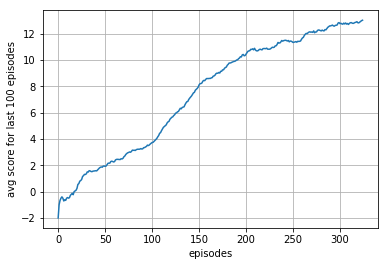

In [7]:
# plotting the avg reward curve
plt.plot(range(len(avg_scores)),avg_scores)
plt.xlabel('episodes')
plt.ylabel('avg score for last 100 episodes')
plt.grid()
plt.show()

In [8]:
# closing the environment
env.close()